In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read data from dataset
bank_data = pd.read_csv("/content/drive/MyDrive/FYP2025/res_data.csv")

bank_data.head()

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,ROA,Interest_on_Debt,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,...,-0.033234,0.095490,1.937042,0.340479,-0.282577,-0.024945,0.836707,-0.204696,-0.212399,-0.073368
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,...,-0.046325,0.083369,3.455872,0.224423,-0.495259,-0.014376,0.882155,-0.222300,-0.238079,-0.099229
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,...,0.424488,0.059887,0.966104,0.508620,0.776523,1.261605,5.765928,1.370637,1.352285,1.453401
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,...,-0.118748,0.057953,1.036243,0.491100,-0.301587,0.633219,3.108466,-0.435956,-0.433295,-0.347396
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,...,-0.167358,0.062734,1.360611,0.423619,-0.480031,0.123395,1.441584,-0.517598,-0.507660,-0.417805


In [ ]:
#0 bankcrpt no
#1 bancrpt yes
print(bank_data['Bankrupt'].value_counts())


In [ ]:
#Visual representation of dataset
bank_data.info()


In [ ]:
#calculate average inventry
average_inventory_series =bank_data.groupby('ORGNR')['Inventory'].transform(lambda x: (x + x.shift(-1)) / 2)

In [ ]:


#add average inventry as column in dataframe
bank_data['Average_Inventory'] = average_inventory_series


In [ ]:
# Replace NaN values in 'Average_Inventory' with the previous values
bank_data['Average_Inventory'] = bank_data['Average_Inventory'].ffill()


In [ ]:



#calculating total liabilities
bank_data['Total_Liabilities'] = bank_data['Total_Curr_Liabilities'] + bank_data['Total_Non_curr_lia']


In [ ]:

bank_data

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,Debt_to_Equity,Equity_to_Assets,ROE,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin,Average_Inventory,Total_Liabilities
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,...,1.937042,0.340479,-0.282577,-0.024945,0.836707,-0.204696,-0.212399,-0.073368,620.0,3967.0
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,...,3.455872,0.224423,-0.495259,-0.014376,0.882155,-0.222300,-0.238079,-0.099229,2395.0,4738.0
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,...,0.966104,0.508620,0.776523,1.261605,5.765928,1.370637,1.352285,1.453401,2380.0,4595.0
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,...,1.036243,0.491100,-0.301587,0.633219,3.108466,-0.435956,-0.433295,-0.347396,713.5,3917.0
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,...,1.360611,0.423619,-0.480031,0.123395,1.441584,-0.517598,-0.507660,-0.417805,549.5,3475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91296,5567417315,2009,43430,1384.0,0,30,2,134.0,0,-109,...,15.526316,0.060510,0.187970,0.059331,1.570248,0.029666,0.005535,0.029666,119.5,2065.0
91297,5567417315,2010,43430,1384.0,0,30,2,70.0,0,-80,...,16.123967,0.058398,-0.090909,0.070132,1.722955,0.014439,-0.002269,0.014439,119.0,1951.0
91298,5567417315,2011,43430,1384.0,0,30,2,125.0,0,-83,...,10.083871,0.090221,0.270968,0.075104,2.000000,0.025934,0.008714,0.025934,97.0,1563.0
91299,5567417315,2012,43430,1384.0,0,30,2,76.0,0,-100,...,7.448819,0.118360,-0.196850,0.029966,1.526718,0.018366,-0.006042,0.018366,68.0,946.0


In [ ]:
#eleminating assests ROE
# Check if columns exist before dropping
if 'Equity_to_Assets' in bank_data.columns and 'ROE' in bank_data.columns:
    bank_data = bank_data.drop(['Equity_to_Assets', 'ROE'], axis=1)
else:
    # Print a message indicating which columns are not found
    missing_columns = [col for col in ['Equity_to_Assets', 'ROE'] if col not in bank_data.columns]
    print(f"Columns not found in DataFrame: {missing_columns}")
bank_data.head()

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,ROA,Interest_on_Debt,Debt_to_Equity,WC_to_Sales,Quick_ratio,Operating_Margin,Net_Margin,Profit_Margin,Average_Inventory,Total_Liabilities
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,...,-0.033234,0.095490,1.937042,-0.024945,0.836707,-0.204696,-0.212399,-0.073368,620.0,3967.0
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,...,-0.046325,0.083369,3.455872,-0.014376,0.882155,-0.222300,-0.238079,-0.099229,2395.0,4738.0
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,...,0.424488,0.059887,0.966104,1.261605,5.765928,1.370637,1.352285,1.453401,2380.0,4595.0
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,...,-0.118748,0.057953,1.036243,0.633219,3.108466,-0.435956,-0.433295,-0.347396,713.5,3917.0
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,...,-0.167358,0.062734,1.360611,0.123395,1.441584,-0.517598,-0.507660,-0.417805,549.5,3475.0


In [ ]:

#opreating cost
bank_data['Operating_CF'] = (bank_data['NetProfit'] + bank_data['Depreciation']) - (bank_data['Total_CurrA'] - bank_data['Total_Curr_Liabilities'])


In [ ]:
#calculating liablites to asset
bank_data['Liabilities_to_Assets'] = bank_data['Total_Liabilities'] / bank_data['Total_Assets']


In [ ]:


#calculating return of assets
bank_data['Return_on_Assets'] = bank_data['NetProfit'] / bank_data['Total_Assets']


In [ ]:
#deb to equity
bank_data['Debt_to_Equity'] = bank_data['Total_Liabilities'] / bank_data['Total_Equity']


In [ ]:
#profit margin and gross margin
bank_data['Profit_Margin'] = bank_data['NetProfit'] / bank_data['Net_Sales']
bank_data['Gross_Margin'] = (bank_data['Net_Sales']-bank_data['Production_Costs']) / bank_data['Net_Sales']


In [ ]:
#networth to assets
bank_data['NetWC_to_Assets'] = (bank_data['Total_CurrA'] - bank_data['Total_Curr_Liabilities']) / bank_data['Total_Assets']


In [ ]:
#ebit
bank_data['EBIT_to_Assets'] = bank_data['OperatingProfit'] / bank_data['Total_Assets']
bank_data['EBIT_to_Sales'] = bank_data['OperatingProfit'] /bank_data['Net_Sales']


In [ ]:
#finanical ratio
bank_data['Current_Ratio'] = bank_data['Total_CurrA'] / bank_data['Total_Curr_Liabilities']
bank_data['Cash_Ratio'] = (bank_data['CashnBank']+bank_data['Securities_Investments']+bank_data['Total_receivables']) / bank_data['Total_Curr_Liabilities']
bank_data['Working_Capital_Ratio'] = bank_data['Total_CurrA'] / bank_data['Total_Curr_Liabilities']


In [ ]:
bank_data['Equity_to_Liabilities'] = bank_data['Total_Equity'] / bank_data['Total_Liabilities']
bank_data['Net_Sales_to_Assets'] = bank_data['Net_Sales'] / bank_data['Total_Assets']
bank_data['Net_Worth_to_Debt'] = (bank_data['Total_Assets'] - bank_data['Intangible FxdA'] - bank_data['Total_Liabilities']) / bank_data['Total_Liabilities']


In [ ]:
bank_data["CF_to_debt"] = bank_data["Operating_CF"] / bank_data["Total_Liabilities"]
bank_data["CF_to_sales"] = bank_data["Operating_CF"] / bank_data["Net_Sales"]
bank_data["CF_coverage"] = bank_data["Operating_CF"] / (bank_data["Other_oper_exp"] + bank_data["Financial_Expenses"] + bank_data["Taxes"] + bank_data["Depreciation"])
bank_data["CF_to_equity"] = bank_data["Operating_CF"] / bank_data["Total_Equity"]
bank_data["CF_to_Assets"] = bank_data["Operating_CF"] / bank_data["Total_Assets"]


In [ ]:
bank_data["RE_to_Sales"] = bank_data["Accumulated_profit"] / bank_data["Net_Sales"]
bank_data["RE_to_Assets"] = bank_data["Accumulated_profit"] / bank_data["Total_Assets"]
bank_data["RE_to_NetIncome"] = bank_data["Accumulated_profit"] / bank_data["NetProfit"]


In [ ]:

bank_data["Inventory_Turnover"] = bank_data["Production_Costs"] / bank_data["Average_Inventory"]
bank_data["Inventory_to_Sales"] = bank_data["Inventory"] / bank_data["Net_Sales"]


In [ ]:
bank_data.head(7)


,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,CF_to_debt,CF_to_sales,CF_coverage,CF_to_equity,CF_to_Assets,RE_to_Sales,RE_to_Assets,RE_to_NetIncome,Inventory_Turnover,Inventory_to_Sales
0,5560024712,1998,23163,1287.0,0,30,2,-558.0,358,-379,...,-0.153012,-0.222671,0.278696,-0.296242,-0.100864,0.000000,0.000000,-0.000000,-2.395161,0.188188
1,5560024712,1999,23163,1287.0,0,30,2,-634.0,351,-395,...,-0.152807,-0.253857,0.341027,-0.528082,-0.118514,0.000000,0.000000,-0.000000,-0.587891,0.254909
2,5560024712,2000,23163,1287.0,0,30,2,3809.0,230,-280,...,-0.071164,-0.117668,0.158738,-0.070626,-0.034367,0.000000,0.000000,0.000000,-0.695378,1.462037
3,5560024712,2001,23163,1287.0,0,30,2,-1147.0,233,-227,...,-0.664539,-0.989358,1.281004,-0.688624,-0.338184,1.238693,0.423412,-3.834118,-2.562018,0.264918
4,5560024712,2002,23163,1287.0,0,30,2,-1250.0,241,-218,...,-0.463885,-0.667495,0.892086,-0.631167,-0.267374,0.997516,0.399569,-1.964927,-2.744313,0.302277
5,5560024712,2003,23163,1287.0,0,30,2,-1492.0,191,-222,...,-0.331917,-0.561285,0.772542,-1.288070,-0.263911,0.500000,0.235095,-0.776756,-6.568765,0.155959
6,5560024712,2004,23163,1287.0,0,30,2,-1024.0,17,-116,...,-5.574074,-1.129456,1.180392,13.086957,-9.788618,-0.318949,-2.764228,0.302760,-3.668998,0.056285


In [ ]:
predictor_columns = [
    'Asset_Turnover_ratio', 'ROA', 'Interest_on_Debt', 'Debt_to_Equity',
    'WC_to_Sales', 'Quick_ratio', 'Operating_Margin',
    'Net_Margin', 'Profit_Margin', 'Operating_CF',
    'Liabilities_to_Assets', 'Return_on_Assets', 'NetWC_to_Assets',
    'EBIT_to_Assets', 'EBIT_to_Sales', 'Current_Ratio', 'Cash_Ratio',
    'Working_Capital_Ratio', 'Equity_to_Liabilities', 'Net_Sales_to_Assets',
    'Net_Worth_to_Debt', 'CF_to_debt', 'CF_to_sales', 'CF_coverage',
    'CF_to_equity', 'CF_to_Assets', 'Gross_Margin', 'RE_to_Sales',
    'RE_to_Assets', 'RE_to_NetIncome', 'Inventory_Turnover', 'Inventory_to_Sales'
]


In [ ]:






# Create a DataFrame indicating missing and inf values
missing_inf_df = pd.DataFrame(index=predictor_columns)
# Fill the DataFrame with zeros (no missing or inf values)
missing_inf_df['Missing'] = 0
missing_inf_df['Inf'] = 0
# Find missing (NaN) values and inf values in the DataFrame
for column in predictor_columns:
    missing_inf_df.at[column, 'Missing'] = bank_data[column].isnull().sum()
    missing_inf_df.at[column, 'Inf'] = np.isinf(bank_data[column]).sum()


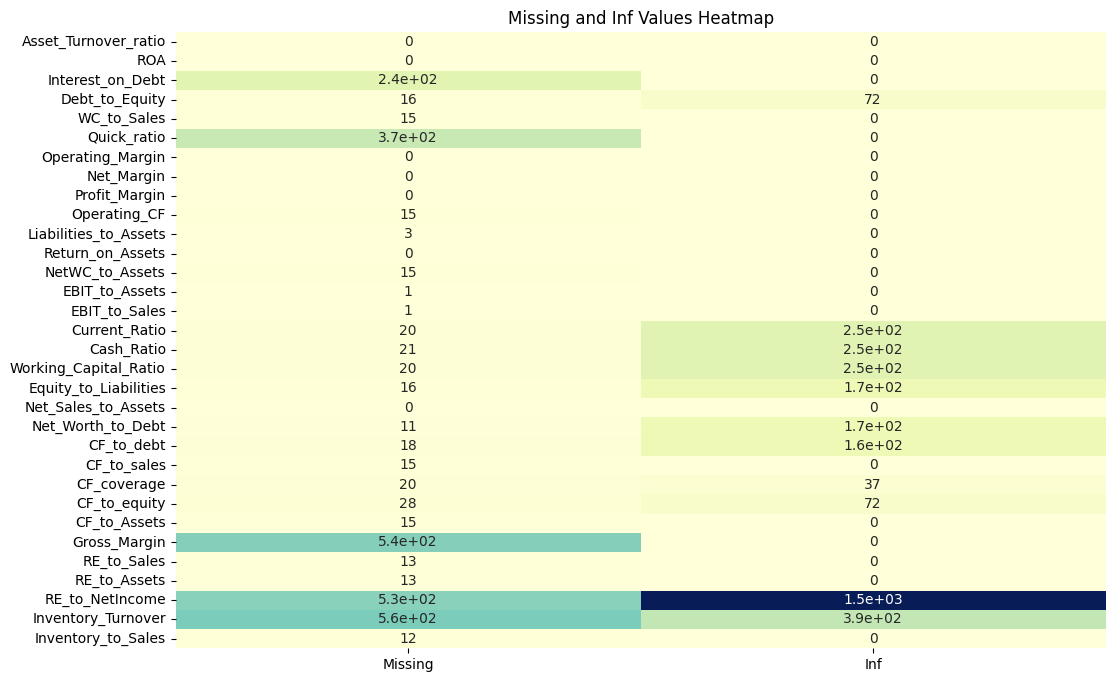

In [ ]:
# Create a heatmap to visualize missing and inf values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_inf_df, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Missing and Inf Values Heatmap')
plt.show()


In [ ]:
# Count missing and inf values in each predictor column
missing_counts = {}
inf_counts = {}
for column in predictor_columns:
    missing_counts[column] = bank_data[column].isnull().sum()
    inf_counts[column] = np.isinf(bank_data[column]).sum()

missing_counts_df = pd.DataFrame(missing_counts, index=['Missing Count'])
inf_counts_df = pd.DataFrame(inf_counts, index=['Inf Count'])

# Create a mask to identify rows with at least one missing or inf value in predictor columns
rows_with_missing_or_inf = bank_data[predictor_columns].isnull().any(axis=1) | bank_data[predictor_columns].apply(np.isinf).any(axis=1)

missing_or_inf_df = bank_data[rows_with_missing_or_inf]

# Print the missing and inf value counts and the DataFrame with affected observations
print("Missing Value Counts:")
print(missing_counts_df)
print("\nInf Value Counts:")
print(inf_counts_df)
print("\nDataFrame with Observations Containing Missing or Inf Values:")
missing_or_inf_df.head(10)


Missing Value Counts:
               Asset_Turnover_ratio  ROA  Interest_on_Debt  Debt_to_Equity  \
Missing Count                     0    0               238              16   

               WC_to_Sales  Quick_ratio  Operating_Margin  Net_Margin  \
Missing Count           15          368                 0           0   

               Profit_Margin  Operating_CF  ...  CF_to_sales  CF_coverage  \
Missing Count              0            15  ...           15           20   

               CF_to_equity  CF_to_Assets  Gross_Margin  RE_to_Sales  \
Missing Count            28            15           543           13   

               RE_to_Assets  RE_to_NetIncome  Inventory_Turnover  \
Missing Count            13              531                 562   

               Inventory_to_Sales  
Missing Count                  12  

[1 rows x 32 columns]

Inf Value Counts:
           Asset_Turnover_ratio  ROA  Interest_on_Debt  Debt_to_Equity  \
Inf Count                     0    0             

,ORGNR,Year,ZipCode,Municipality,Bankrupt,Business_Category,Size_Category,OperatingProfit,Financial_Income,Financial_Expenses,...,CF_to_debt,CF_to_sales,CF_coverage,CF_to_equity,CF_to_Assets,RE_to_Sales,RE_to_Assets,RE_to_NetIncome,Inventory_Turnover,Inventory_to_Sales
7,5560064403,1998,24131,1285.0,0,30,0,40.0,11,-51,...,-0.375716,-1.470852,1.086093,-1.547170,-0.299543,0.412556,0.084018,inf,-25.888889,0.058296
13,5560064403,2004,24131,1285.0,0,30,0,32.0,5,-36,...,-0.354194,-1.055556,0.889632,-2.660000,-0.312207,0.000000,0.000000,NaN,-5.851852,0.174603
16,5560064403,2007,24131,1285.0,0,30,0,37.0,6,-42,...,-0.321700,-0.664577,0.574526,-1.892857,-0.274256,0.037618,0.015524,inf,-7.746835,0.134796
130,5560234238,1998,18205,162.0,0,30,3,-519.0,0,-5,...,-0.155880,-0.022864,0.040668,-0.550369,-0.121475,0.000000,0.000000,NaN,-4.857276,0.109727
131,5560234238,1999,18205,162.0,0,30,3,-499.0,2,-3,...,-0.113521,-0.015056,0.025908,-0.385749,-0.087709,0.000000,0.000000,NaN,-5.390858,0.102512
153,5560284761,2001,11152,180.0,0,30,0,0.0,0,0,...,-33.666667,-5.315789,5.315789,-0.926606,-0.893805,-0.052632,-0.008850,-inf,-0.463415,2.157895
157,5560284761,2007,11122,180.0,0,30,0,0.0,0,0,...,-34.000000,-51.000000,51.000000,-1.000000,-0.971429,-4.000000,-0.076190,-inf,-0.095238,21.000000
169,5560312000,2006,18205,162.0,0,30,0,10.0,0,0,...,-1.181159,-38.809524,58.214286,-5.948905,-0.938940,0.619048,0.014977,1.857143,-inf,0.000000
173,5560312000,2010,18205,162.0,0,30,0,216.0,2,0,...,-4.064103,-0.339764,0.416557,-1.081911,-0.665966,0.058950,0.115546,0.454545,-inf,0.000000
174,5560312000,2012,18205,162.0,0,30,0,58.0,0,-79,...,-7.000000,-4.095745,2.938931,-1.415441,-0.982143,2.031915,0.487245,-5.305556,-inf,0.000000


In [ ]:
bank_data.replace([np.inf, -np.inf], 0, inplace=True)
bank_data = bank_data.dropna()
print(bank_data['Bankrupt'].value_counts())
print(bank_data.shape)


Bankrupt
0    73069
1      298
Name: count, dtype: int64
(73367, 125)


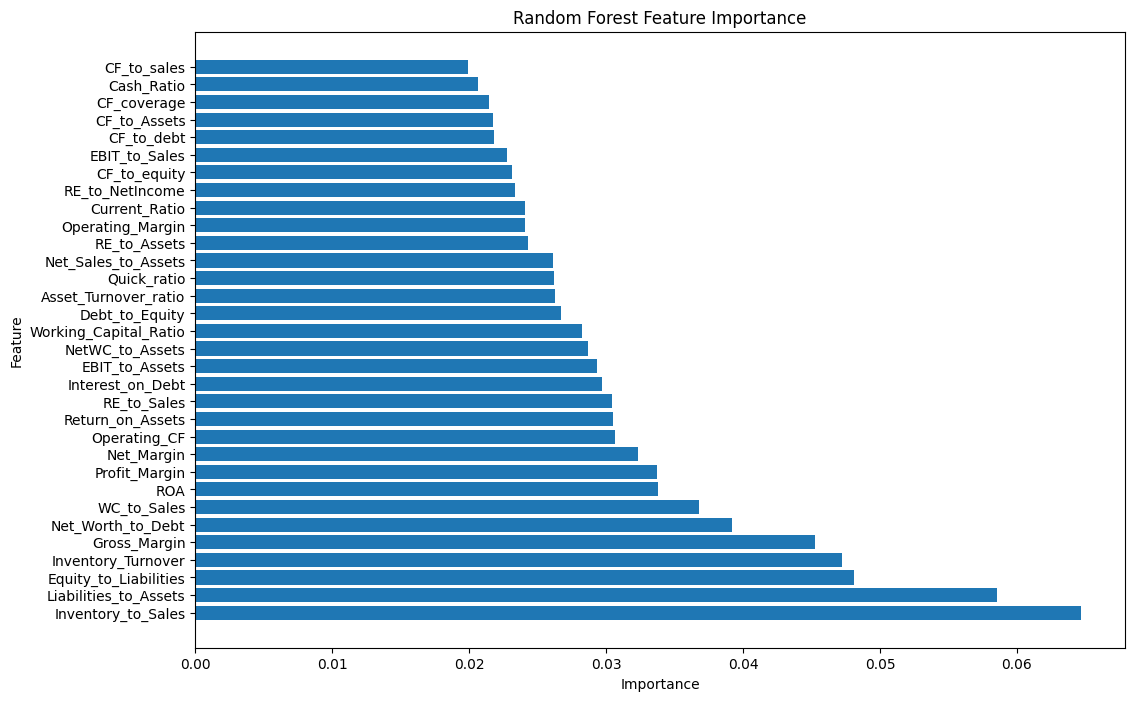

Feature Importance:
                  Feature  Importance
31     Inventory_to_Sales    0.064670
10  Liabilities_to_Assets    0.058577
18  Equity_to_Liabilities    0.048071
30     Inventory_Turnover    0.047256
26           Gross_Margin    0.045235
20      Net_Worth_to_Debt    0.039217
4             WC_to_Sales    0.036796
1                     ROA    0.033806
8           Profit_Margin    0.033724
7              Net_Margin    0.032320
9            Operating_CF    0.030627
11       Return_on_Assets    0.030475
27            RE_to_Sales    0.030462
2        Interest_on_Debt    0.029720
13         EBIT_to_Assets    0.029335
12        NetWC_to_Assets    0.028678
17  Working_Capital_Ratio    0.028277
3          Debt_to_Equity    0.026739
0    Asset_Turnover_ratio    0.026295
5             Quick_ratio    0.026226
19    Net_Sales_to_Assets    0.026163
28           RE_to_Assets    0.024271
6        Operating_Margin    0.024085
15          Current_Ratio    0.024064
29        RE_to_NetIncome    0

In [ ]:
# Select predictors and target column
predictors = [
    'Asset_Turnover_ratio', 'ROA', 'Interest_on_Debt', 'Debt_to_Equity',
    'WC_to_Sales', 'Quick_ratio', 'Operating_Margin',
    'Net_Margin', 'Profit_Margin', 'Operating_CF',
    'Liabilities_to_Assets', 'Return_on_Assets', 'NetWC_to_Assets',
    'EBIT_to_Assets', 'EBIT_to_Sales', 'Current_Ratio', 'Cash_Ratio',
    'Working_Capital_Ratio', 'Equity_to_Liabilities', 'Net_Sales_to_Assets',
    'Net_Worth_to_Debt', 'CF_to_debt', 'CF_to_sales', 'CF_coverage',
    'CF_to_equity', 'CF_to_Assets', 'Gross_Margin', 'RE_to_Sales',
    'RE_to_Assets', 'RE_to_NetIncome', 'Inventory_Turnover', 'Inventory_to_Sales'
]

target = 'Bankrupt'

# Separate predictors and target
X = bank_data[predictors]
y = bank_data[target]

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Print the sorted feature importance
print("Feature Importance:")
print(feature_importance_df)


In [ ]:
feature_scores = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores


,0
Inventory_to_Sales,0.064670
Liabilities_to_Assets,0.058577
Equity_to_Liabilities,0.048071
Inventory_Turnover,0.047256
Gross_Margin,0.045235
Net_Worth_to_Debt,0.039217
WC_to_Sales,0.036796
ROA,0.033806
Profit_Margin,0.033724
Net_Margin,0.032320


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (44020, 32)
X_test shape:  (29347, 32)
y_train shape:  (44020,)
y_test shape:  (29347,)


In [ ]:
# Count the number of bankrupt and non-bankrupt companies
bankrupt_count_train = y_train.sum()
non_bankrupt_count_train = len(y_train) - bankrupt_count_train
bankrupt_count_test = y_test.sum()
non_bankrupt_count_test = len(y_test) - bankrupt_count_test

print("Train Set:")
print("Bankrupt Companies:", bankrupt_count_train)
print("Non-Bankrupt Companies:", non_bankrupt_count_train)
print("\nTest Set:")
print("Bankrupt Companies:", bankrupt_count_test)
print("Non-Bankrupt Companies:", non_bankrupt_count_test)


Train Set:
Bankrupt Companies: 182
Non-Bankrupt Companies: 43838

Test Set:
Bankrupt Companies: 116
Non-Bankrupt Companies: 29231


In [ ]:
# ✅ Import the classifier first
from sklearn.ensemble import RandomForestClassifier

# 1. Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)#hyper parameter tuning

# 2. Fit on resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# 3. Predict on test data
y_pred = rf_model.predict(X_test)

In [ ]:
import pickle

# Save the trained Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[27104  2127]
 [   76    40]]


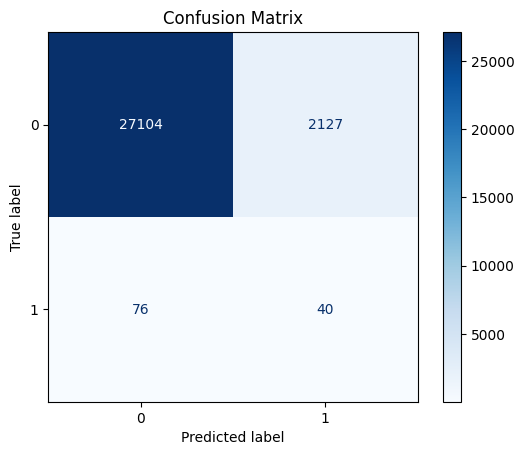

In [ ]:

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     29231
           1       0.02      0.34      0.04       116

    accuracy                           0.92     29347
   macro avg       0.51      0.64      0.50     29347
weighted avg       0.99      0.92      0.96     29347



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


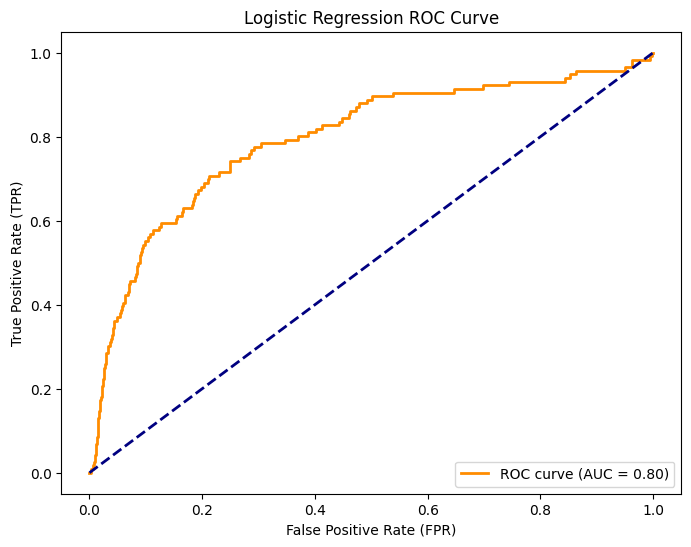

AUC Score: 0.7956131834530888


In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
import matplotlib.pyplot as plt

# Assuming you already have your X_train, y_train, X_test, y_test data loaded
# If using resampling techniques like SMOTE for imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=426)

# Fit the model to the resampled data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Save the logistic regression model
joblib.dump(logreg_model, 'logistic_regression_model.pkl')

# Make predictions on the test set using the logistic regression model
y_pred = logreg_model.predict(X_test)

# Predict probabilities for the positive class
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", auc)

# Now your logistic regression model is ready for predictions.


In [ ]:
pip install shap


In [ ]:
# Only use a sample (e.g., 500 rows) for explanation
import shap
sample_data = X_test.sample(500, random_state=42)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(sample_data)


In [ ]:
import shap


# Create a SHAP explainer using the base logistic regression model
explainer = shap.Explainer(rf_model, X_train_resampled)

# Compute SHAP values for the test set (or whichever data you want to explain)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)


 57%|===========         | 33437/58694 [08:40<06:32]       

In [ ]:
import pandas as pd
import shap


# If X_train is a NumPy array, make sure to convert it to a DataFrame with column names
X_train_df = pd.DataFrame(X_train_resampled, columns=predictor_columns)
X_test_df = pd.DataFrame(X_test, columns=predictor_columns)

# Initialize the SHAP explainer
explainer = shap.Explainer(logreg_model, X_train_df)

# Calculate SHAP values
shap_values = explainer(X_test_df)

# Calculate mean absolute SHAP value for each feature (global importance)
shap_summary = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Mean_Abs_SHAP_Value': np.abs(shap_values.values).mean(axis=0)
})

# Sort by importance
shap_summary_sorted = shap_summary.sort_values(by='Mean_Abs_SHAP_Value', ascending=False)

# Save top 10 (or any number) to CSV
top_n = 10
shap_summary_sorted.head(top_n).to_csv('top_shap_features.csv', index=False)

print("Top SHAP features saved to 'top_shap_features.csv'")


In [ ]:
# Step 1: Import libraries
from sklearn.linear_model import LogisticRegression
import joblib


# Step 3: Save the model
joblib.dump(logreg_model, 'logistic_regression_model.pkl')

print("✅ Model saved as 'logistic_regression_model.pkl'")


In [ ]:
! pip install streamlit -q


In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run /content/drive/MyDrive/FYP2025/app_py.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.236.133:8501

⠸⠼⠴your url is: https://loud-ends-talk.loca.lt


In [48]:
!ls /content/drive/MyDrive


'1st YEAR.zip'
'2023_01_02 3_53 pm Office Lens.pdf'
'311521104033 (1).jpg'
 311521104033arw.pdf
 311521104033.jpg
 33.pptx
 Abraham-Silberschatz-Operating-System-Concepts-10th-2018.pdf
'Adobe Scan Aug 26, 2022-1.pdf'
'ADT PROJECT- FIF.gdoc'
'AIML UNIT_1,2 NOTES.pdf'
'AIML UNIT_1 NOTES.pdf'
'AIML UNIT_2 NOTES - NAVIE BAYES .pdf'
'AIML UNIT_2 NOTES.pdf'
 aiml.zip
'ALGO LAB EXP 1.docx'
 algorithms
'Algo unit 2.pdf'
'Assignment (11-Nov-2021 at 7:55 PM)'
'CamScanner 01-21-2022 20.24.21.pdf'
 Classroom
'Colab Notebooks'
'Color Map.gdoc'
'Color Map.pdf'
'Copy of STUCOR_CS8591-DN.pdf'
'CSE-ND-2018-CS 8392-Object Oriented Programming -693917395-20190201152319.gdoc'
'CSE-ND-2018-CS 8392-Object Oriented Programming -693917395-20190201152319.pdf'
'CY8151-Engineering Chemistry IMP QB (1).gdoc'
'CY8151-Engineering Chemistry IMP QB (1).pdf'
'Data Science Lab Miniproject Title (1).gsheet'
'Data Science Lab Miniproject Title.gsheet'
'DBMS EXP 1 OBS.gdoc'
'DBMS EXP 1 OBS.pdf'
 DOC-20220905-WA0026.
 DOC-